## Stock Price Prediction Using LSTM

Importing Data and Libraries To Be Used

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [4]:
from google.colab import files
files.upload()

Saving NSE-tata-stock.csv to NSE-tata-stock.csv


{'NSE-tata-stock.csv': b'Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)\r\n28-09-18,234.05,235.95,230.2,233.5,233.75,3069914,7162.35\r\n29-09-18,234.55,236.8,231.1,233.8,233.25,5082859,11859.95\r\n30-09-18,240,240,232.5,235,234.25,2240909,5248.6\r\n01-10-18,233.3,236.75,232,236.25,236.1,2349368,5503.9\r\n02-10-18,233.55,239.2,230.75,234,233.3,3423509,7999.55\r\n03-10-18,235,237,227.95,233.75,234.6,5395319,12589.59\r\n04-10-18,235.95,237.2,233.45,234.6,234.9,1362058,3202.78\r\n05-10-18,237.9,239.25,233.5,235.5,235.05,2614794,6163.7\r\n06-10-18,233.15,238,230.25,236.4,236.6,3170894,7445.41\r\n07-10-18,223.45,236.7,223.3,234,233.95,6377909,14784.5\r\n08-10-18,216.35,223.7,212.65,221.65,222.65,4570939,10002.01\r\n09-10-18,222.5,225.4,214.85,216.35,216,3508990,7735.81\r\n10-10-18,222.5,235.15,220.65,221.05,222,7514106,17130.29\r\n11-10-18,221,224.5,219.1,223.15,222.95,1232507,2742.84\r\n12-10-18,224,225,218.2,220.95,221.05,1738824,3856.72\r\n13-10-18,222,224.6,215.2,222.

In [5]:
df=pd.read_csv("NSE-tata-stock.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-18,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,29-09-18,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,30-09-18,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,01-10-18,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,02-10-18,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


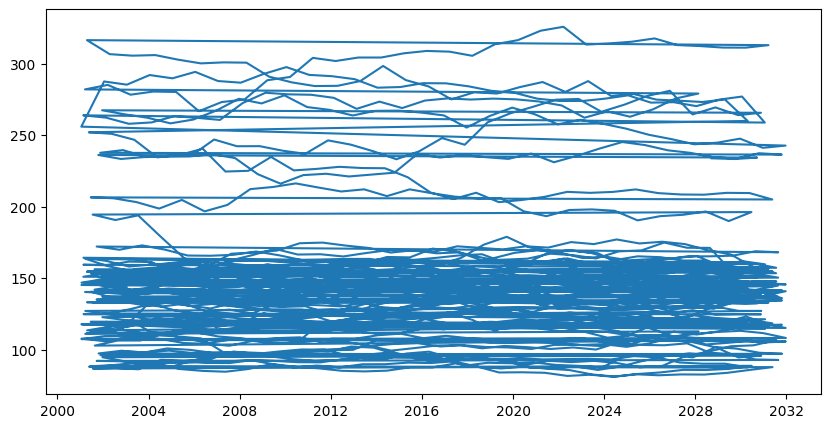

In [6]:
df["Date"]=pd.to_datetime(df.Date,format="%y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(10,5))
plt.plot(df["Close"],label='Close Price history')

In [7]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]


new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

train_data=final_dataset[0:1000,:]
valid_data=final_dataset[1000:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [8]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape= (x_train_data.shape[1],1)))
lstm_model.add(Dropout(0,2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0,2))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=12,batch_size=18,verbose=2)

Epoch 1/12
53/53 - 7s - loss: 0.0489 - 7s/epoch - 125ms/step
Epoch 2/12
53/53 - 4s - loss: 0.0405 - 4s/epoch - 73ms/step
Epoch 3/12
53/53 - 2s - loss: 0.0392 - 2s/epoch - 47ms/step
Epoch 4/12
53/53 - 2s - loss: 0.0387 - 2s/epoch - 46ms/step
Epoch 5/12
53/53 - 2s - loss: 0.0363 - 2s/epoch - 47ms/step
Epoch 6/12
53/53 - 3s - loss: 0.0331 - 3s/epoch - 47ms/step
Epoch 7/12
53/53 - 4s - loss: 0.0285 - 4s/epoch - 67ms/step
Epoch 8/12
53/53 - 2s - loss: 0.0272 - 2s/epoch - 46ms/step
Epoch 9/12
53/53 - 2s - loss: 0.0268 - 2s/epoch - 47ms/step
Epoch 10/12
53/53 - 2s - loss: 0.0266 - 2s/epoch - 46ms/step
Epoch 11/12
53/53 - 3s - loss: 0.0254 - 3s/epoch - 56ms/step
Epoch 12/12
53/53 - 5s - loss: 0.0238 - 5s/epoch - 86ms/step


33/33 [==============================] - 1s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-18-6f90ce881ae7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=closing_price


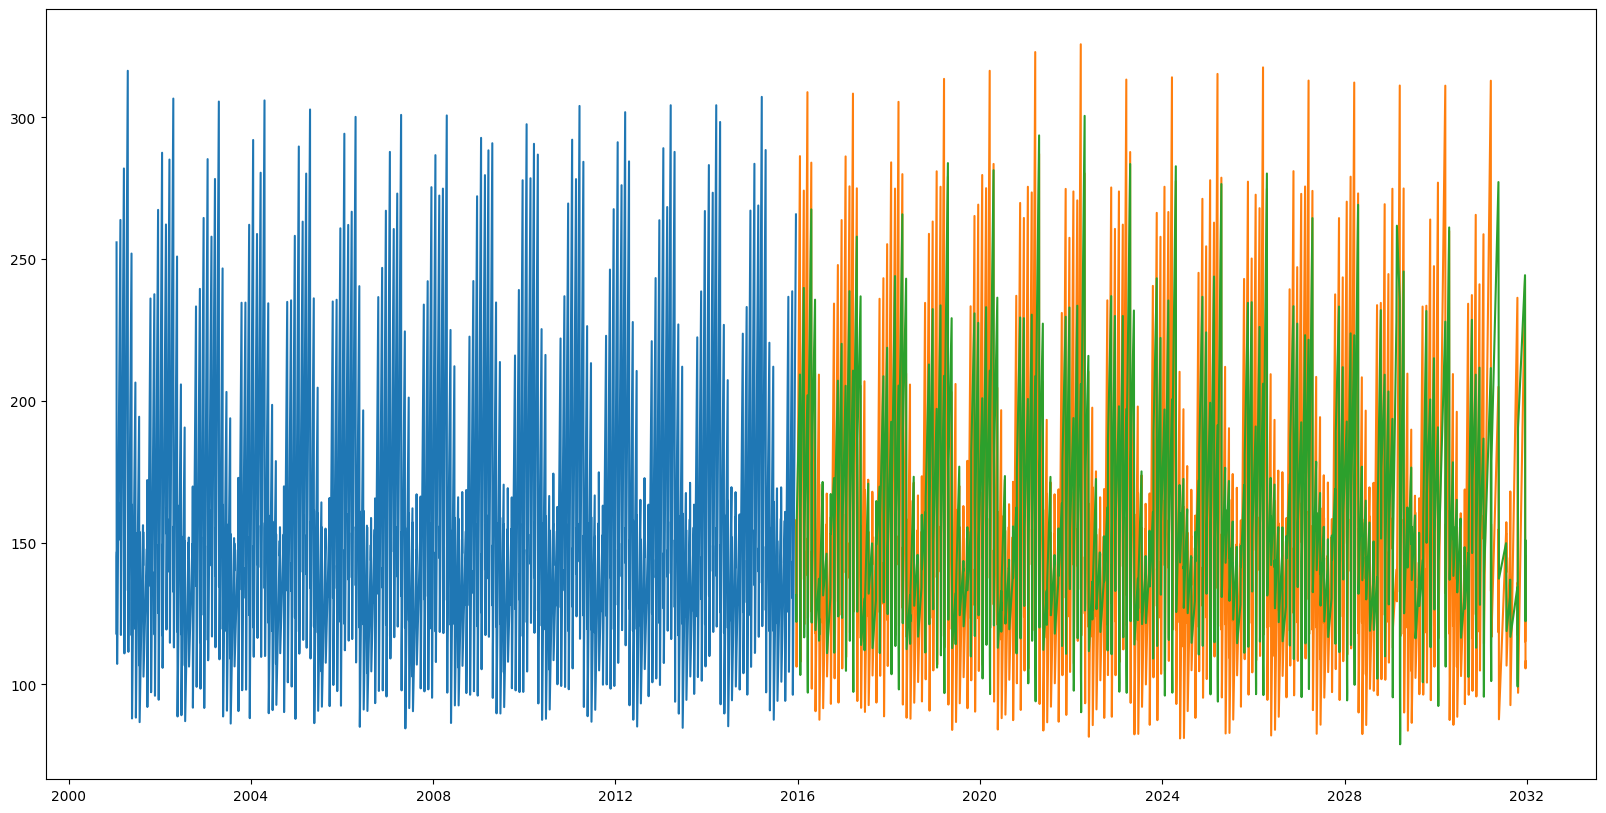

In [18]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

X_test=[]
for i in range(60, inputs_data.shape[0]):
  X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

lstm_model.save("saved_lstm_model.h5")

train_data=new_dataset[:1000]
valid_data=new_dataset[1000:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])